##Importando bibliotecas

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

##Carregando Base
 - esta base contem o nome e categorias de filmes 
 - vamos usar o Kmeans para realizar o agrupamento entre os grupos semalhantes
 - a ideia de uma maquina de aprendizado não supervisionada é ela encontrar uma resposta para o problema, diferente do que fizemos anteriormente onde ja tinhas a resposta e treinamos a maquina para classificar

In [2]:
uri  = "https://raw.githubusercontent.com/RafaelBernardo18/aprendizado-de-maquina/main/movies.csv"

base = pd.read_csv(uri)

base.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


##Preprocessamento

In [3]:
#utilizando o metodo get_dummies para extrair em diversas colunas os generos de filmes
tipos = base.genres.str.get_dummies()
nova_base = pd.concat([base, tipos], axis = 1)

nova_base.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#pre processamento usando StandardScaler
scaler = StandardScaler()

tipos_escalados = scaler.fit_transform(tipos)

tipos_escalados

array([[-0.25291028, -0.37964454,  3.55067626, ..., -0.41592697,
        -0.18669242, -0.15145543],
       [-0.25291028, -0.37964454,  3.55067626, ..., -0.41592697,
        -0.18669242, -0.15145543],
       [-0.25291028, -0.37964454, -0.28163649, ..., -0.41592697,
        -0.18669242, -0.15145543],
       ...,
       [-0.25291028,  2.63404287, -0.28163649, ...,  2.40426826,
        -0.18669242, -0.15145543],
       [ 3.95397138, -0.37964454, -0.28163649, ..., -0.41592697,
        -0.18669242, -0.15145543],
       [ 3.95397138, -0.37964454, -0.28163649, ..., -0.41592697,
        -0.18669242, -0.15145543]])

##Treinando o modelo

In [5]:
modelo = KMeans(n_clusters=15) #esse parametro é referente a quantidade de grupos deseja criar
modelo.fit(tipos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#visializando em qual grupo ele calssificou cada filme 
labels = modelo.labels_

#foi preciso usar um for pois o array é muito grande
for i in labels:
    print(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
11
6
6
0
9
3
14
5
3
6
3
0
4
8
4
4
2
4
3
8
3
1
0
0
11
3
3
11
11
4
6
0
1
0
4
4
11
9
9
6
0
1
9
8
0
11
3
14
6
4
3
0
11
3
5
8
8
2
4
3
0
11
9
9
11
0
3
3
0
3
4
6
4
3
11
9
2
4
6
0
4
11
3
4
3
0
6
1
11
9
0
0
0
3
8
6
1
3
14
3
8
3
0
3
6
11
0
8
3
1
1
3
1
1
11
4
4
3
3
9
9
1
3
4
3
1
6
3
4
0
11
1
0
2
3
6
3
3
2
0
0
3
11
11
11
14
3
0
0
4
3
0
14
2
0
0
4
3
0
0
8
0
3
11
11
6
2
2
11
6
3
0
1
1
8
0
3
1
0
1
6
0
2
11
8
2
1
5
14
3
3
2
14
9
8
8
3
1
12
6
3
11
3
0
11
1
1
4
1
3
14
1
0
0
11
3
3
3
0
4
3
3
3
11
11
3
11
2
14
8
4
4
3
11
3
3
11
0
0
0
0
3
3
2
11
11
2
2
14
8
0
3
3
11
11
11
4
11
3
3
0
11
6
9
6
0
0
4
3
9
6
11
4
3
3
0
14
3
3
4
11
9
11
9
3
0
4
11
3
0
14
4
14
11
4
1
4
4
2
4
11
0
11
3
11
3
3
3
3
8
0
2
0
3
3
0
3
0
0
11
11
3
2
3
3
3
0
0
3
12
8
2
3
3
4
11
3
2
3
8
3
11
0
0
3
11
0
2
3
3
11
0
3
3
3
0
11
1
4
2
3
0
3
8
3
3
3
12
0
11
12
2
3
3
8
9
3
3
11
3
0
3
3
3
1
6
1
11
4
9
3
3
0
3
4
0
0
8
8
4
0
0
9
11
9
3
3
3
3
14
9
3
0
14
3
3
14
0
9
9
0
0
3
1
6
0
0
11
5
6
2
0


In [7]:
#visualizando centroides
#possição vetorial em que os centrois se encontram 
modelo.cluster_centers_ 

array([[-2.52910278e-01, -3.79644543e-01, -1.69970387e-01,
        -2.10323309e-01, -9.16490167e-03,  1.58928983e+00,
        -3.19532727e-01, -3.14323346e-01, -2.13725307e-01,
        -5.09341361e-02, -8.89665397e-02, -3.27799620e-01,
        -6.56949143e-02, -1.55255244e-01, -2.28458033e-01,
         3.40658997e-01, -2.57323652e-01, -3.76870418e-01,
        -1.86692421e-01, -1.51455433e-01],
       [-2.52910278e-01,  6.74752618e-01,  4.25456897e-01,
        -1.99520637e-01, -3.34750650e-02, -2.72011841e-01,
        -2.45987893e-01, -2.83898972e-01, -5.04092753e-01,
         2.60160938e-01, -8.89665397e-02,  6.61622778e-01,
        -6.56949143e-02, -1.55255244e-01, -2.02403558e-01,
        -2.32692090e-01,  3.88615657e+00,  3.05689566e-01,
        -1.86692421e-01, -1.51455433e-01],
       [-2.52910278e-01,  2.54744920e+00,  8.64435109e-01,
        -2.10323309e-01, -7.61687125e-02, -1.35186335e-01,
        -2.77804453e-01, -3.05071806e-01, -1.61609598e-01,
         2.72353221e-01, -8.8

##Visualizações

In [8]:
#tranformando os centroides em um DataFrame para melhor visualização
grupos = pd.DataFrame(modelo.cluster_centers_, columns = tipos.columns)

grupos.head().T

,0,1,2,3,4
(no genres listed),-0.252910,-0.252910,-0.252910,-0.252910,-0.252910
Action,-0.379645,0.674753,2.547449,-0.379645,-0.367764
Adventure,-0.169970,0.425457,0.864435,-0.090055,-0.226242
Animation,-0.210323,-0.199521,-0.210323,-0.210323,-0.210323
Children,-0.009165,-0.033475,-0.076169,0.010411,-0.201334
Comedy,1.589290,-0.272012,-0.135186,-0.629212,-0.527761
Crime,-0.319533,-0.245988,-0.277804,-0.319533,-0.280555
Documentary,-0.314323,-0.283899,-0.305072,-0.314323,3.181437
Drama,-0.213725,-0.504093,-0.161610,0.906252,-0.780919
Fantasy,-0.050934,0.260161,0.272353,-0.075847,-0.220256


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bddeeeb8>,
      dtype=object)

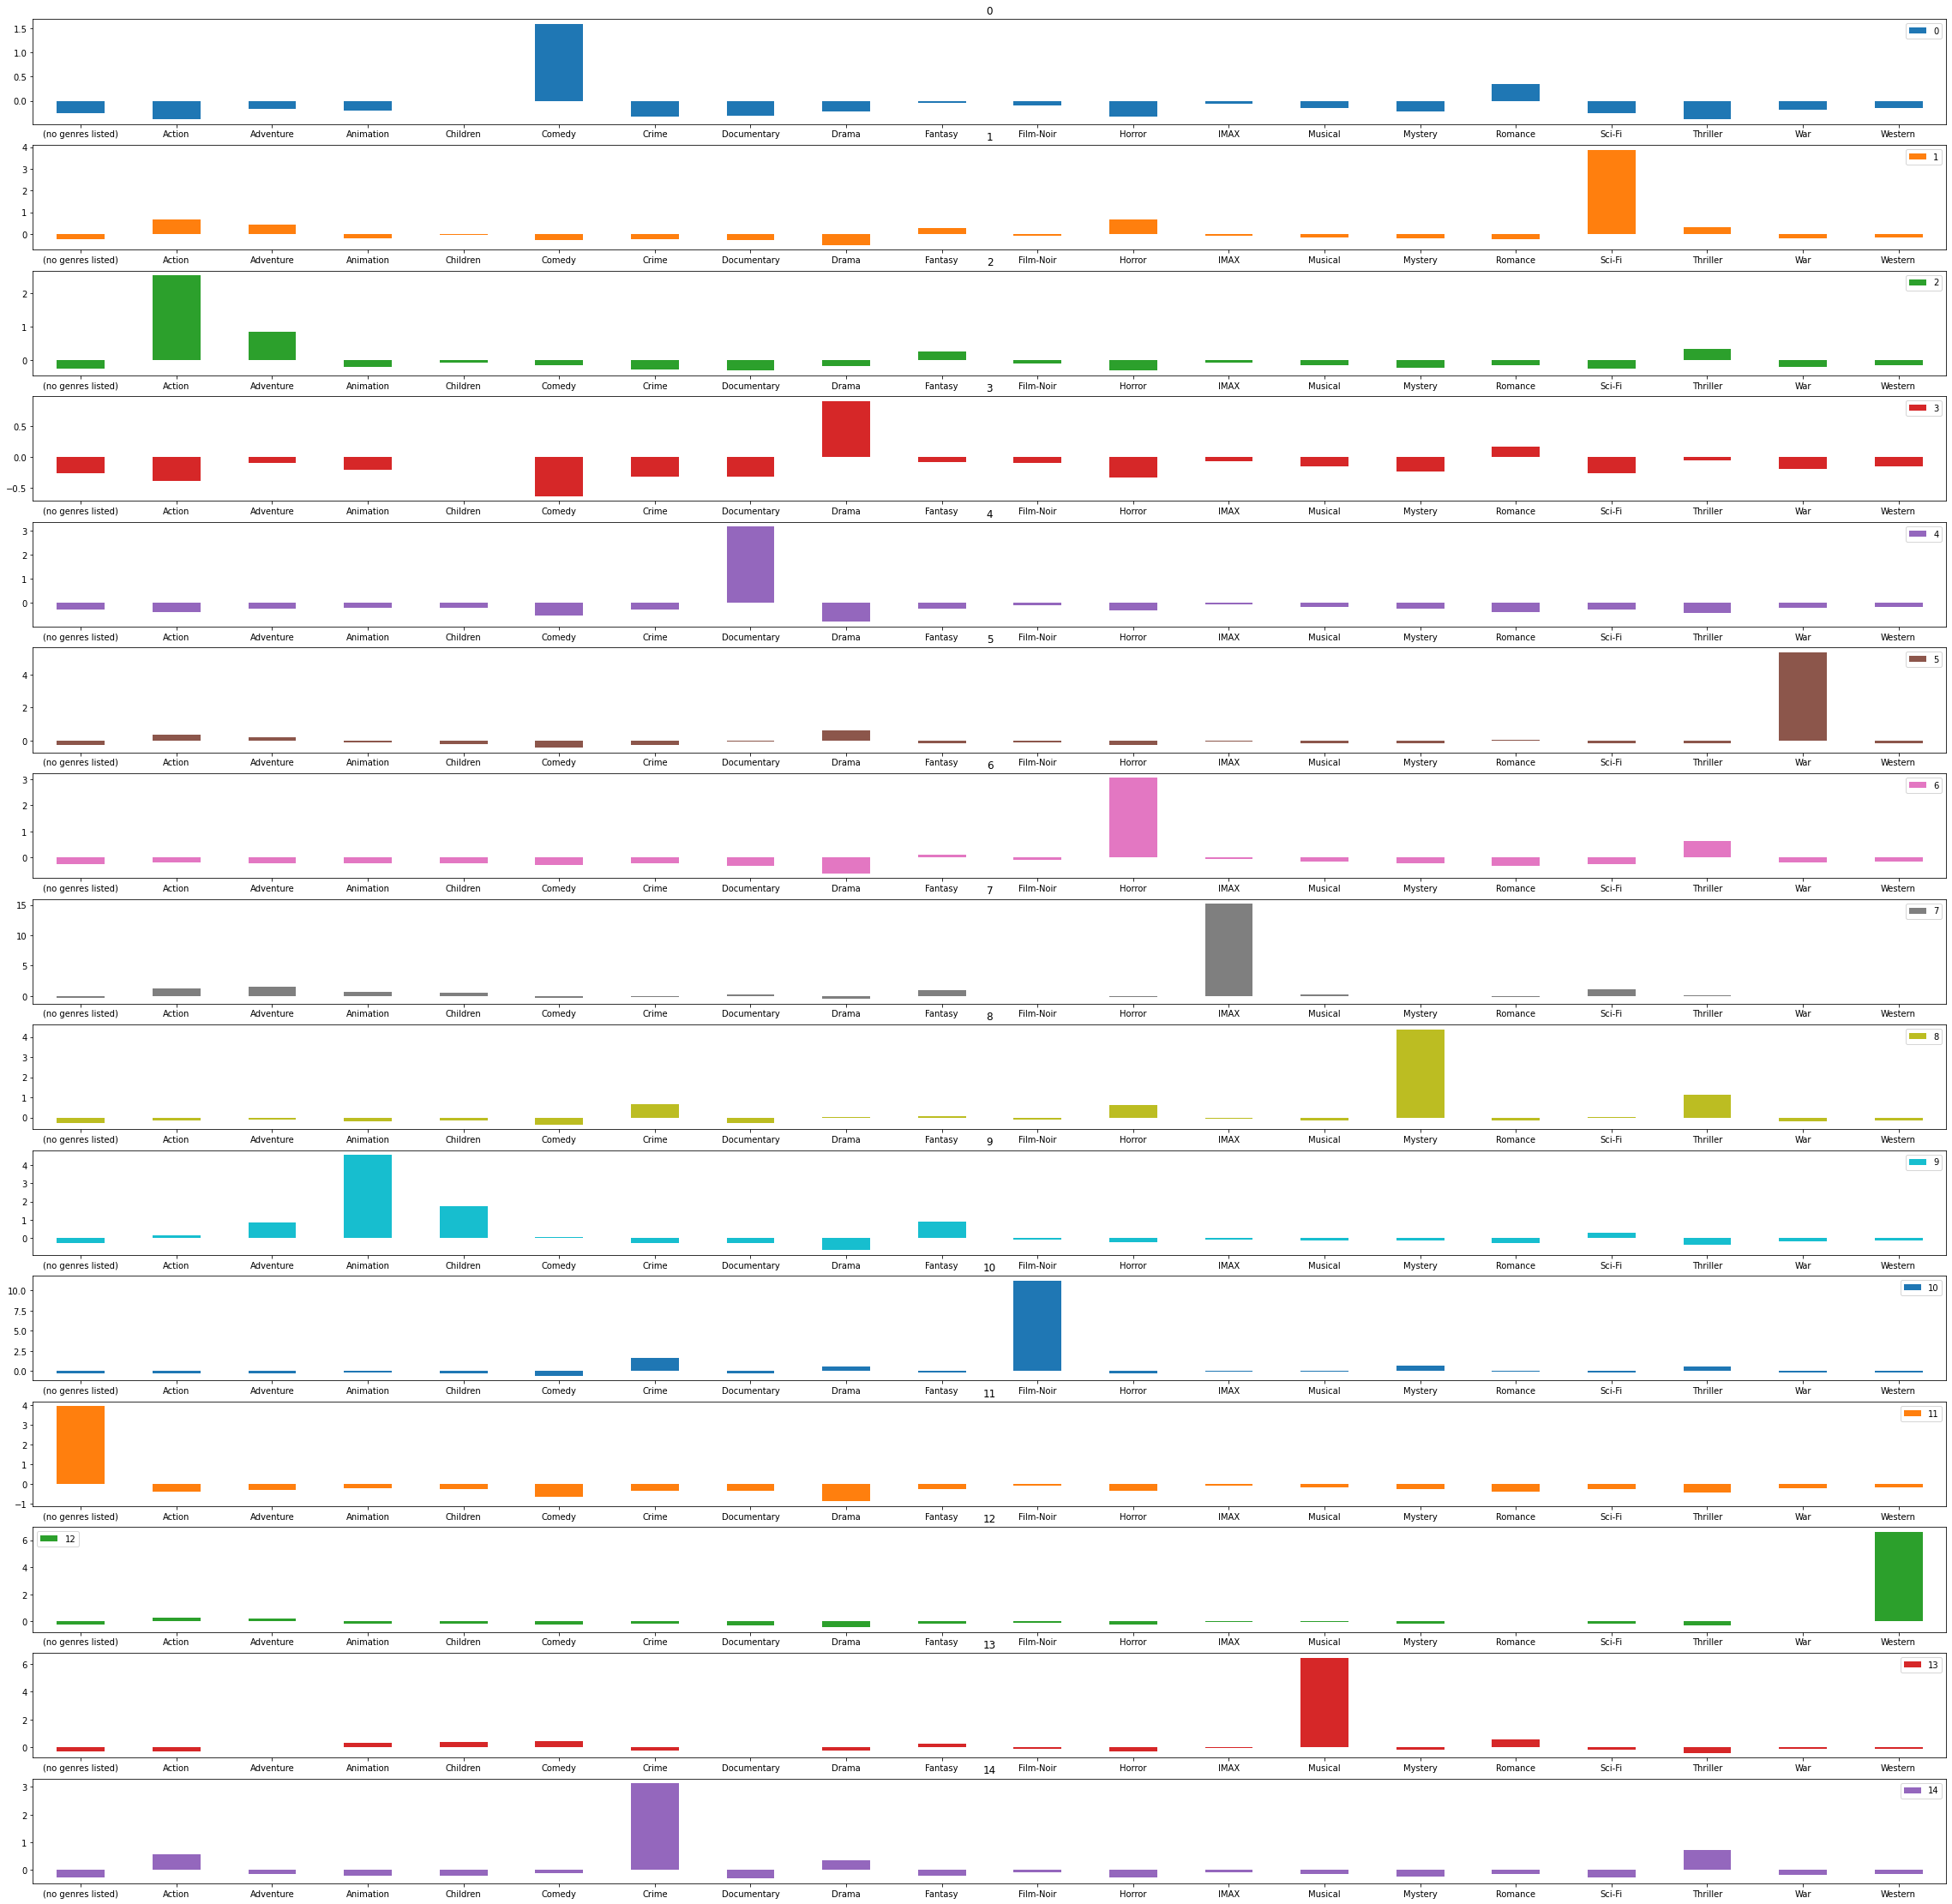

In [9]:
#visualizando os grupos de forma grafica
grupos.T.plot.bar(subplots=True, figsize = (40,40), sharex=False, rot=0)

In [10]:
#alguns filtros por grupros
grupo = 4

filtro = (modelo.labels_ == grupo)

base[filtro].sample(10)

,movieId,title,genres
20699,100838,I Am Jesus (2011),Documentary
30694,135081,Circo (2011),Documentary
36910,152916,Scene from the Elevator Ascending Eiffel Tower...,Documentary
41660,166007,One Rogue Reporter (2014),Comedy|Documentary
32417,140082,Best Kept Secret (2013),Documentary
35395,148456,The Queen (1968),Documentary
17692,88676,Divine Horsemen: The Living Gods of Haiti (1985),Documentary
42699,168664,Ghostland: The View of the Ju'Hoansi (2016),Documentary
21453,103635,Pax Americana and the Weaponization of Space (...,Documentary
20924,101782,Better This World (2011),Documentary


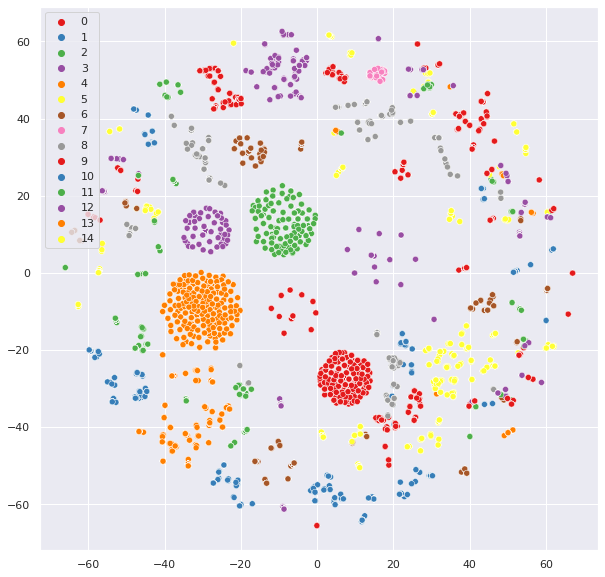

In [11]:
from sklearn.manifold import TSNE #o manifold auxilia em trasnformaçoes e visualizações para dados de multiplas dimensoes
import seaborn as sns #biblioteca grafica

tsne = TSNE()

visualiza = tsne.fit_transform(tipos_escalados) 

#criando um Scaterplot
sns.set(rc = {'figure.figsize': (10,10)})
sns.scatterplot(x=visualiza[:,0], y=visualiza[:,1], hue=modelo.labels_, palette=sns.color_palette('Set1', 15))

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b',
  'b'],
 'dcoord': [[0.0, 2.5137698012597136, 2.5137698012597136, 0.0],
  [0.0, 3.3543976161008473, 3.3543976161008473, 2.5137698012597136],
  [0.0, 3.754583304185998, 3.754583304185998, 3.3543976161008473],
  [0.0, 3.824688895809957, 3.824688895809957, 3.754583304185998],
  [0.0, 3.9487199623621034, 3.9487199623621034, 3.824688895809957],
  [0.0, 4.628930401217868, 4.628930401217868, 3.9487199623621034],
  [0.0, 4.682675519877742, 4.682675519877742, 4.628930401217868],
  [0.0, 5.061434469410536, 5.061434469410536, 4.682675519877742],
  [0.0, 5.6019560939508475, 5.6019560939508475, 5.061434469410536],
  [0.0, 5.625750298111179, 5.625750298111179, 5.6019560939508475],
  [0.0, 6.755231907724647, 6.755231907724647, 5.625750298111179],
  [0.0, 6.948120984259071, 6.948120984259071, 6.755231907724647],
  [0.0, 11.502651849360745, 11.502651849360745, 6.948120984259071],
  [0.0, 15.49892813

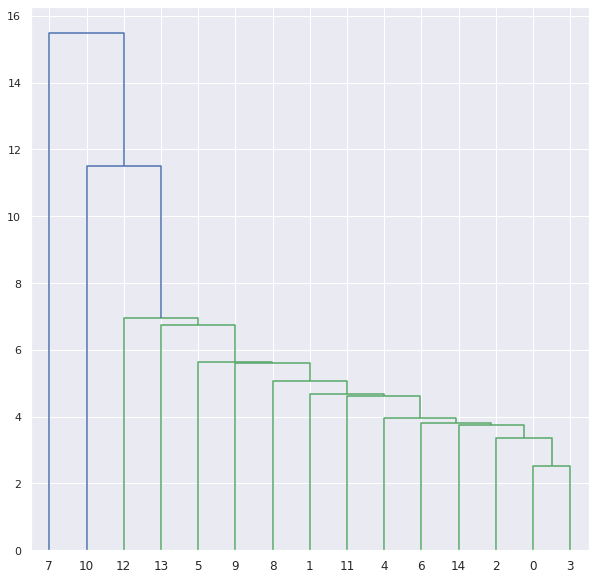

In [12]:
#dendograma
#essa visualização grafica monta um grafico de era semelhante a uma arvore
from scipy.cluster.hierarchy import dendrogram, linkage

matriz_de_distancias = linkage(grupos)

dendrogram(matriz_de_distancias)

##Metodo de Elbow
 - esse metodo pode nos indicar a quantidade de clusters certos
 - assim evitamos de escolher um numero arbitrario de clusters na criação do modelo

1 916860.0
2 853452.4957482327
3 807939.3084050278
4 752393.305774187
5 706594.0979172634
6 648741.7625032349
7 615383.5892267714
8 588415.8297157799
9 531704.7747650606
10 515311.477281885
11 454871.57949247124
12 431962.9343328128
13 432312.71475038654
14 410365.68848162086


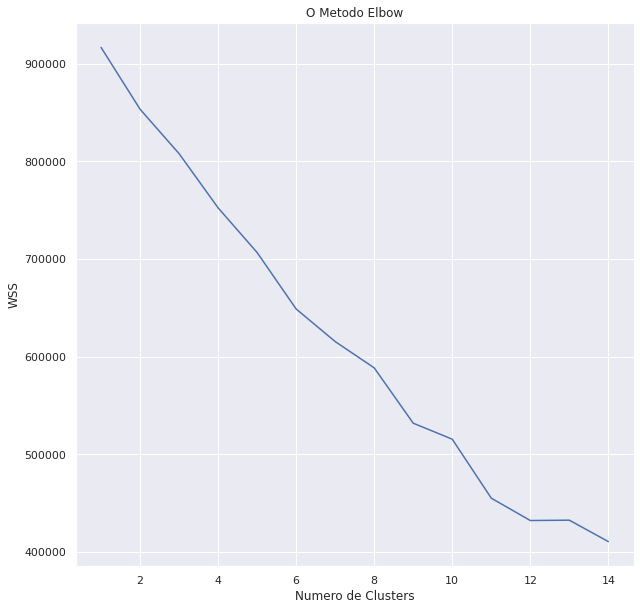

In [13]:
import matplotlib.pyplot as plt #bilbioteca grafica

#esse metodo testara a variancia entre o intervalo que atribuirmos
wcss = []

for i in range(1, 15):
    modelo = KMeans(n_clusters = i, init = 'random')
    modelo.fit(tipos_escalados)
    print (i,modelo.inertia_)
    wcss.append(modelo.inertia_)
#o valor inertia corresponde ao somatório dos erros quadráticos das instâncias de cada cluster

plt.plot(range(1, 15), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') 
plt.show() #é possivel analisar que a variancia acaba 10 clusters